# Heart Rate Variability 

In [101]:
import pandas as pd
import os

def load_ecg_data(directory_path):
    """Load ECG data from all txt files in a directory."""
    dataframes = []
    for file in os.listdir(directory_path):
        if file.endswith(".txt"):
            file_path = os.path.join(directory_path, file)
            try:
                data = pd.read_csv(file_path, sep="\t", header=None)
                data.columns = ["beat", "ECG", "transformed_ecg"]
                dataframes.append(data)
            except:
                pass
    return dataframes

# Use the function to load data
ecg_data = load_ecg_data("C:/Users/fred/Desktop/hearts-signal/entrainment/data/T4")


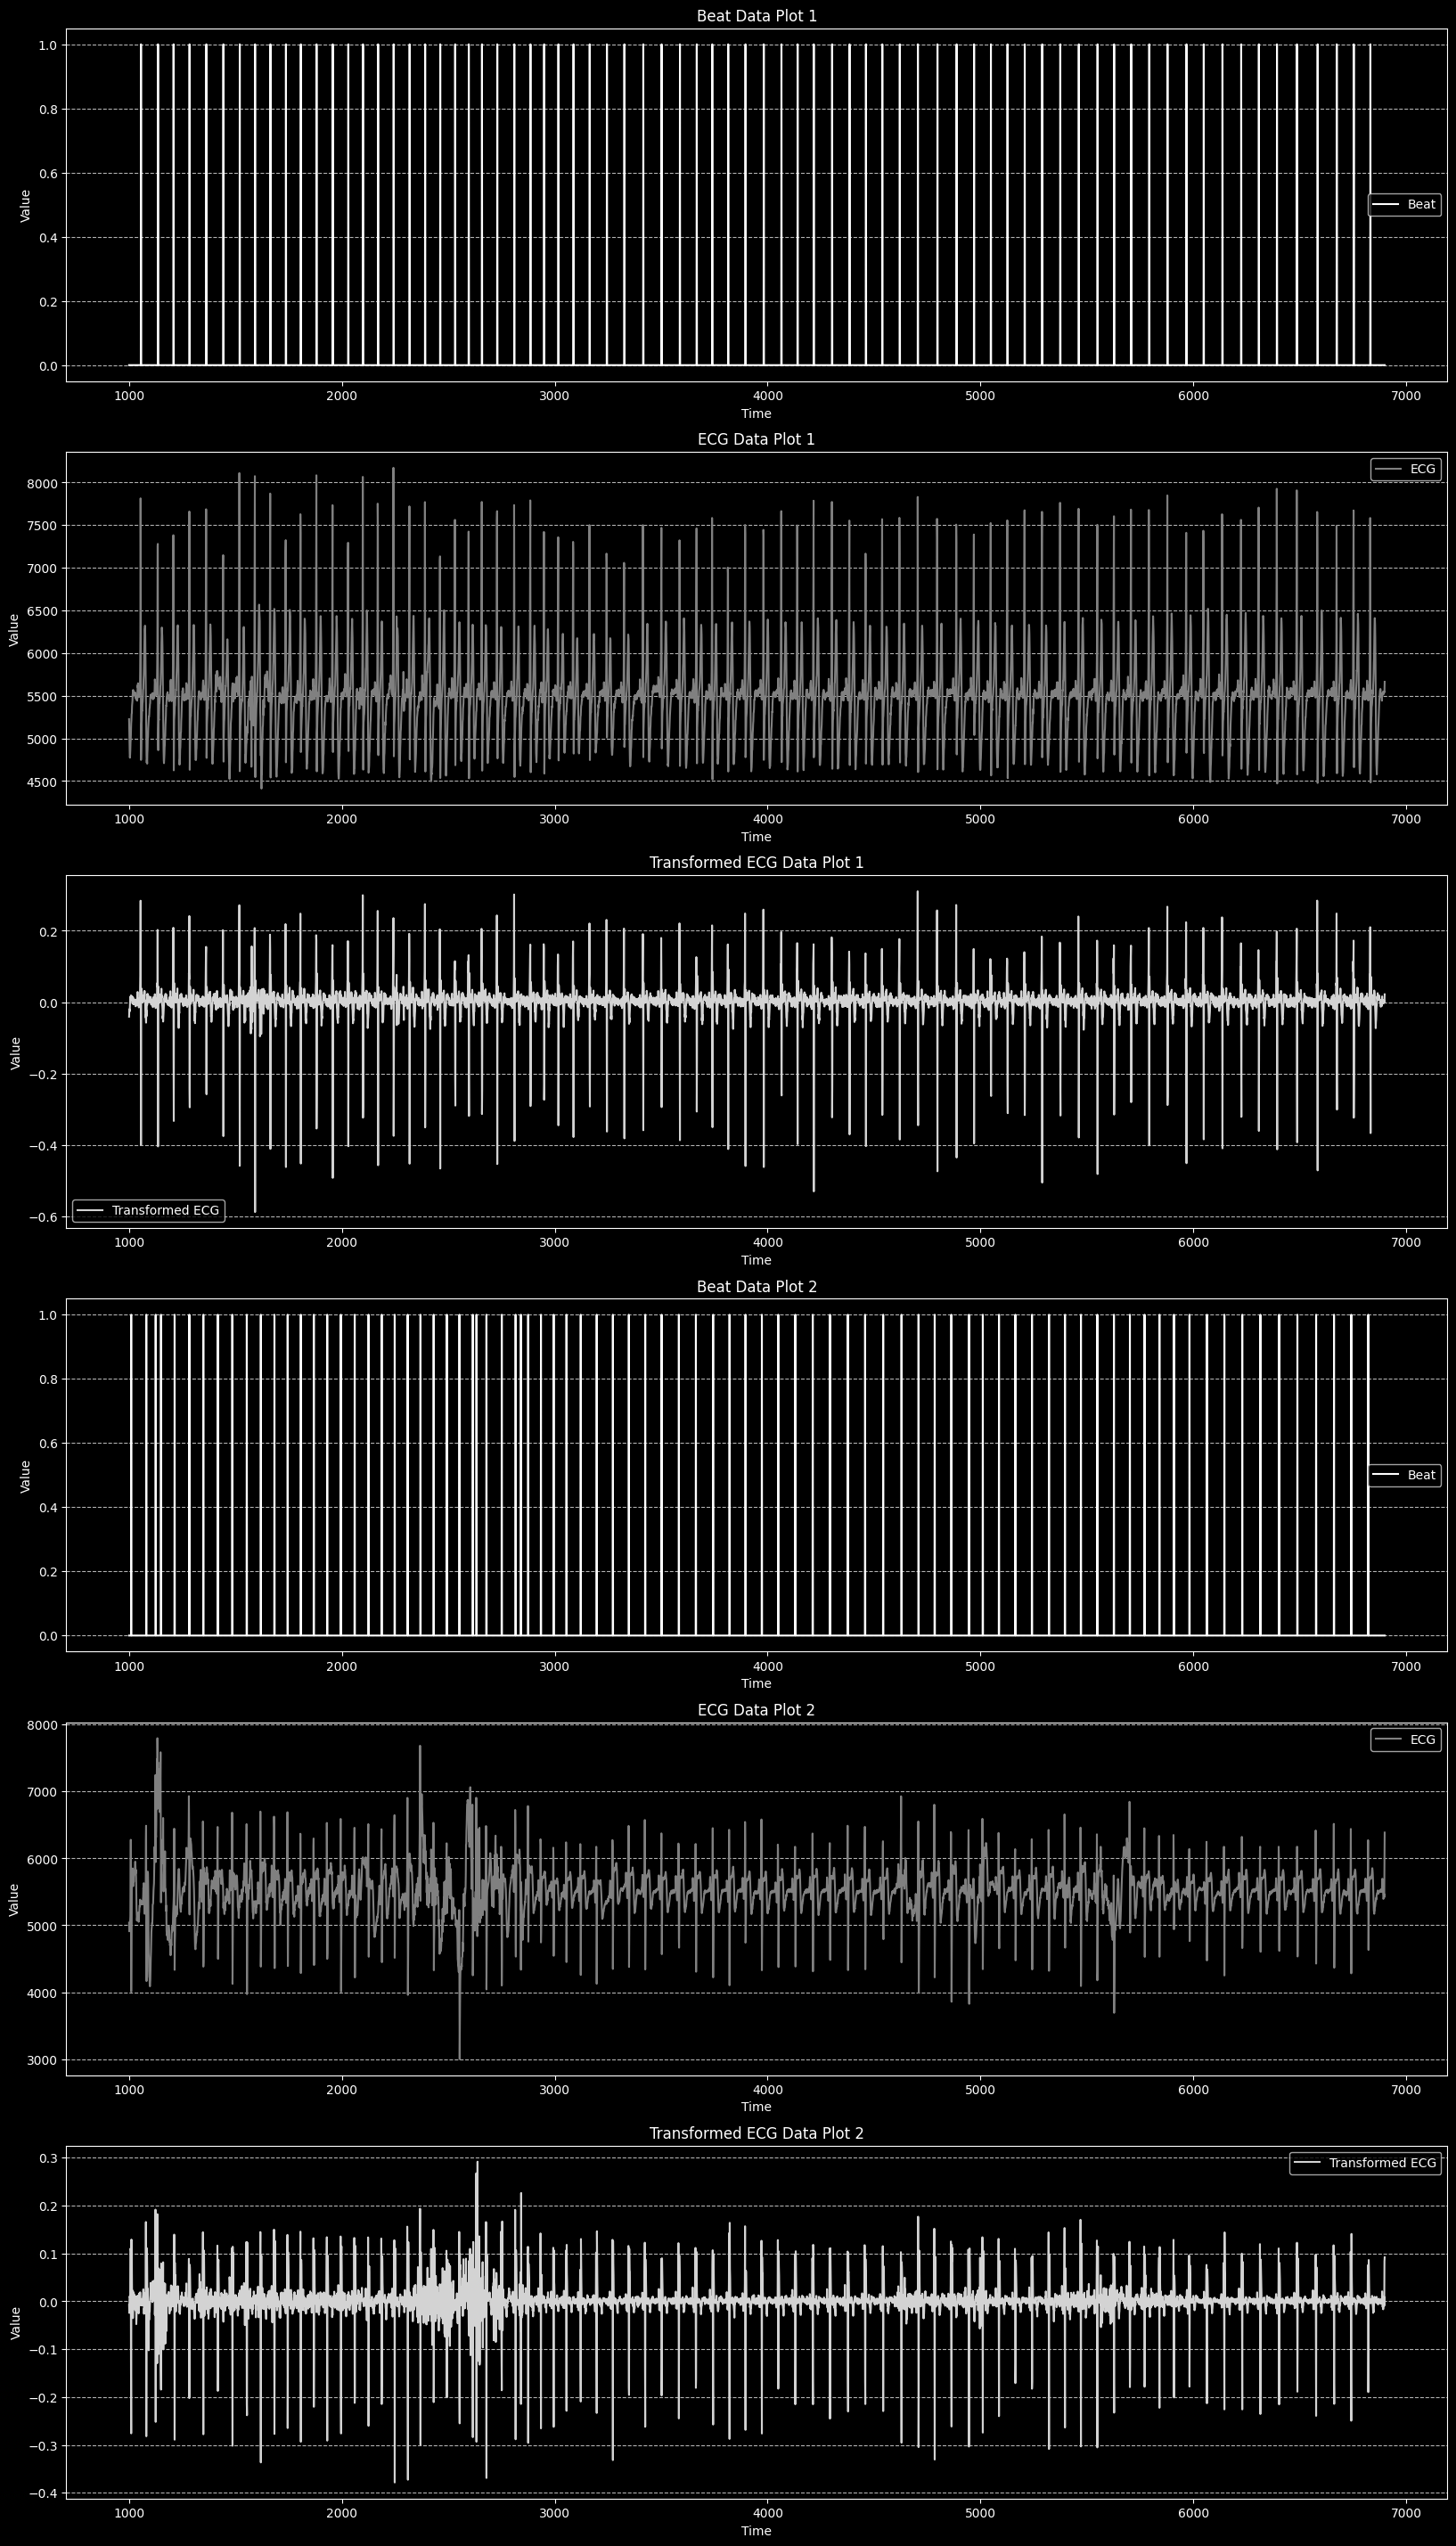

In [102]:
import matplotlib.pyplot as plt

def plot_ecg_data(ecg_data, start, stop):
    # Set dark background
    plt.style.use('dark_background')

    # Create a figure and subplots
    fig, axs = plt.subplots(len(ecg_data)*3, figsize=(20,6*len(ecg_data)*3))

    # Iterate over all dataframes
    for i, df in enumerate(ecg_data):
        axs[i*3].plot(df['beat'][start:stop], color='white', label='Beat')
        axs[i*3].set_title(f'Beat Data Plot {i+1}')
        axs[i*3].set_xlabel('Time')
        axs[i*3].set_ylabel('Value')
        axs[i*3].legend()
        axs[i*3].grid(axis='y', linestyle='--', alpha=0.7)

        axs[i*3+1].plot(df['ECG'][start:stop], color='grey', label='ECG')
        axs[i*3+1].set_title(f'ECG Data Plot {i+1}')
        axs[i*3+1].set_xlabel('Time')
        axs[i*3+1].set_ylabel('Value')
        axs[i*3+1].legend()
        axs[i*3+1].grid(axis='y', linestyle='--', alpha=0.7)

        axs[i*3+2].plot(df['transformed_ecg'][start:stop], color='lightgrey', label='Transformed ECG')
        axs[i*3+2].set_title(f'Transformed ECG Data Plot {i+1}')
        axs[i*3+2].set_xlabel('Time')
        axs[i*3+2].set_ylabel('Value')
        axs[i*3+2].legend()
        axs[i*3+2].grid(axis='y', linestyle='--', alpha=0.7)

    # Show the plot in a new window
    plt.show()

# Use the function to plot data
plot_ecg_data(ecg_data, start=1000, stop=6900)


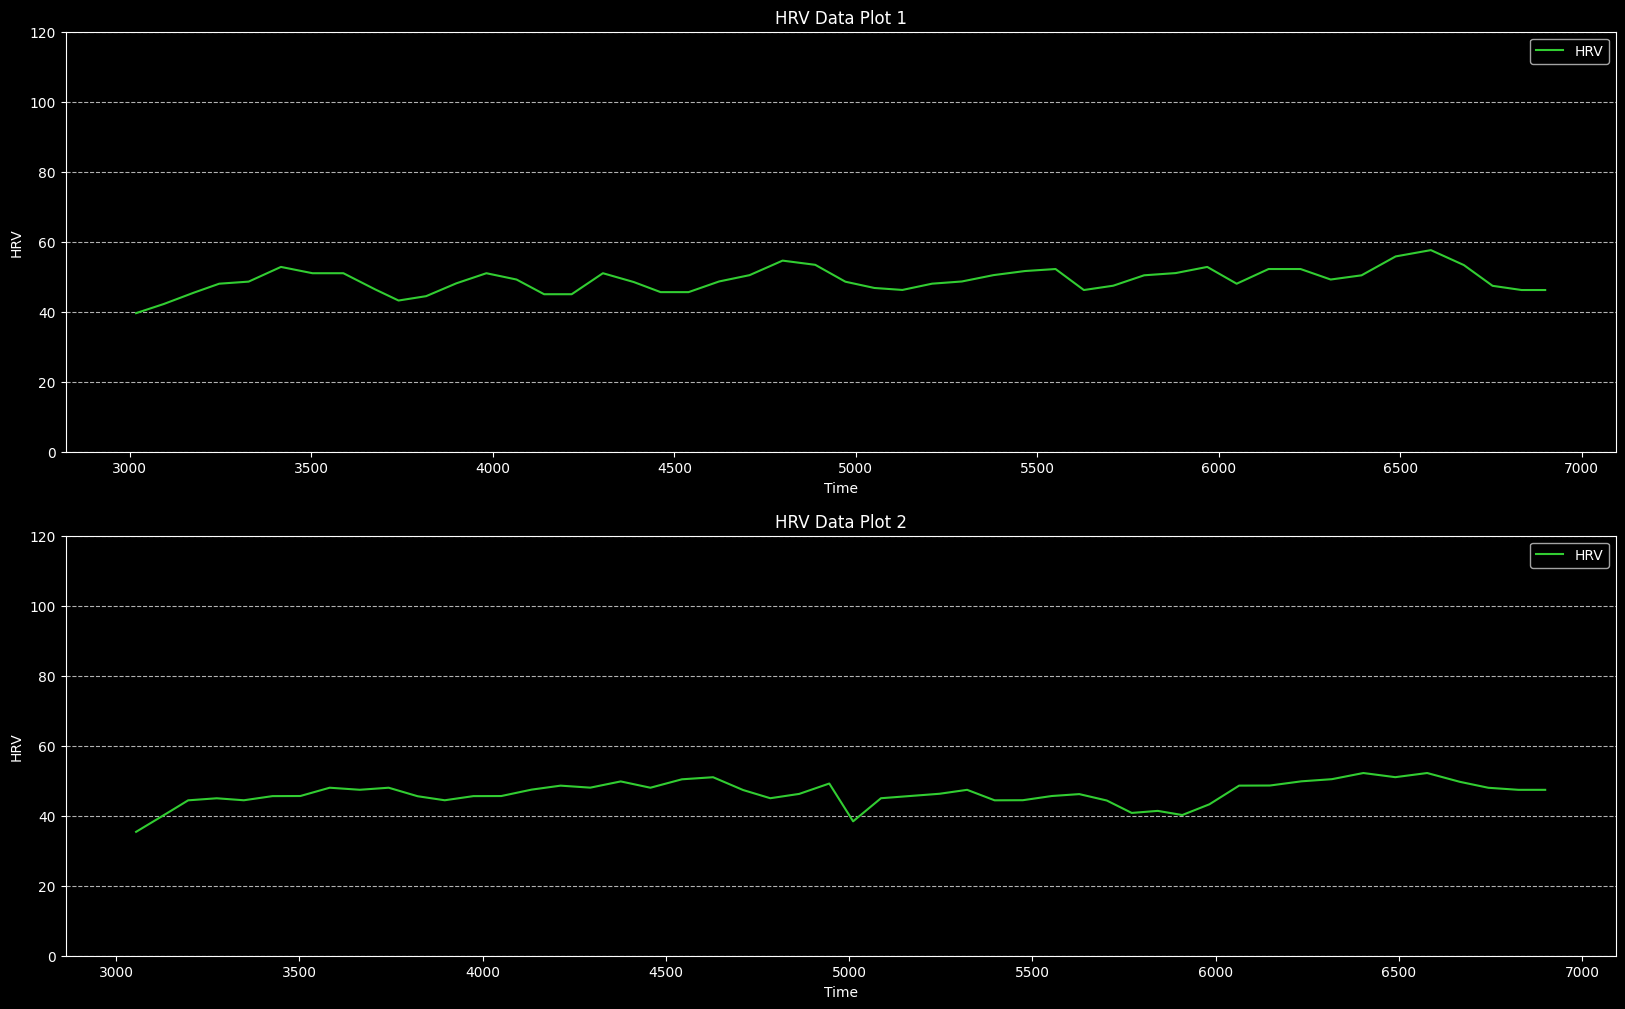

In [103]:
def calculate_hrv(ecg_data):
    # Iterate over all dataframes
    for df in ecg_data:

        if 'hrv' in df.columns:
            df.drop('hrv', axis=1, inplace=True)
        # Initialize a counter for 0 value readings
        zero_counter = 0
        # Initialize an empty list to store the counts of 0 value readings before each beat
        zero_counts = []

        # Iterate over the 'beat' column
        for beat in df['beat']:
            if beat == 0:
                # Increment the counter if the beat is 0
                zero_counter += 1
                zero_counts.append(None)
            elif beat == 1:
                # Convert the count of zeros to beats per minute (bpm)
                # We have 100 readings per second, so we multiply by 60 to get bpm
                bpm = (zero_counter * 60) / 100
                # Append the bpm to the list and reset the counter
                zero_counts.append(bpm)
                zero_counter = 0

        # Add hrv as a new column to the dataframe
        df['hrv'] = zero_counts
# Use the function to calculate the heart rate variability
calculate_hrv(ecg_data)

def plot_hrv_data(ecg_data, start, stop):
    # Create a figure and axes
    fig, axs = plt.subplots(len(ecg_data), 1, figsize=(20, len(ecg_data)*6))

    # Iterate over all dataframes

    for i, df in enumerate(ecg_data):
        # Get the HRV values and corresponding indices
        hrv_values = df['hrv'][start:stop].interpolate()
        hrv_indices = hrv_values.index

        # Plot the HRV data as a continuous line
        axs[i].plot(hrv_indices, hrv_values, color='limegreen', label='HRV')
        axs[i].set_title(f'HRV Data Plot {i+1}')
        axs[i].set_xlabel('Time')
        axs[i].set_ylabel('HRV')
        axs[i].set_ylim(0, 120)  # Set the y-axis range from 0 to 120
        axs[i].legend()
        axs[i].grid(axis='y', linestyle='--', alpha=0.7)

    # Show the plot in a new window
    plt.show()

# Use the function to plot HRV data
plot_hrv_data(ecg_data, 3000, 6900)